In [182]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

to_rgb = lambda image: cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
to_gray = lambda image: cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [176]:
board = cv2.imread('../data/board+dominoes/01.jpg')

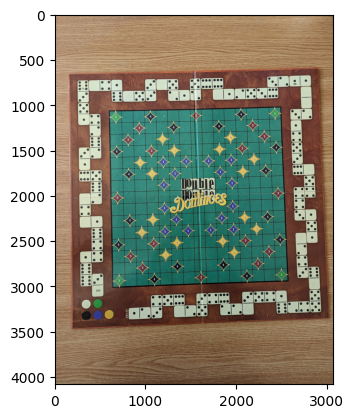

In [205]:
plt.imshow(to_rgb(board))

In [211]:
def segmentation(img, K):
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,K,None,criteria,100,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    return res.reshape((img.shape))

board_segmented = segmentation(board, 3)
board_segmented_gray = to_gray(board_segmented)

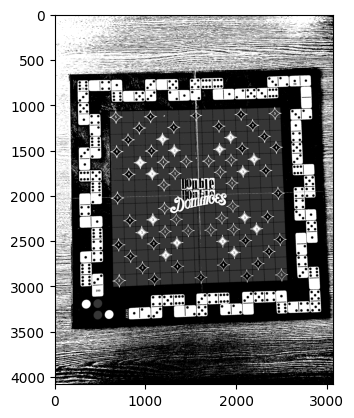

In [212]:
plt.imshow(board_segmented_gray, cmap='gray')

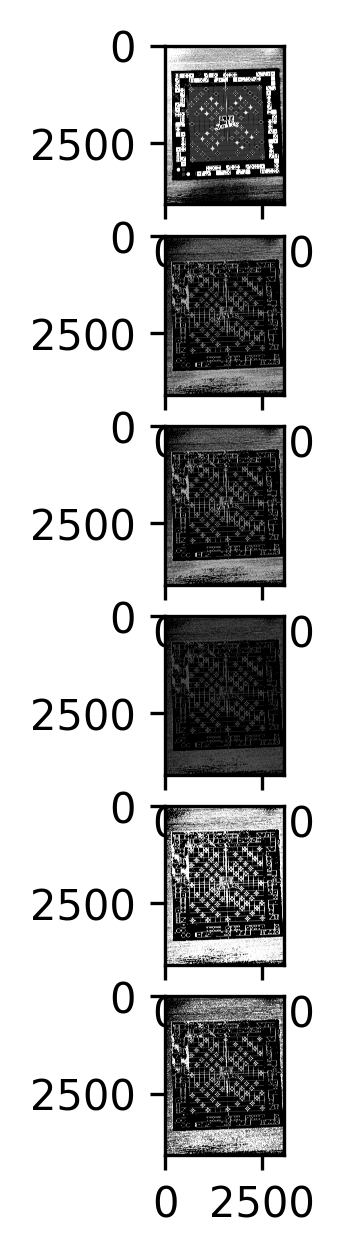

In [202]:
# https://stackoverflow.com/questions/57089115/background-texture-pattern-removal-before-crack-detection-with-opencv

board_blur = cv2.GaussianBlur(board_segmented_gray, (3, 3), 0)
board_thresh = cv2.adaptiveThreshold(board_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

board_bin = cv2.bitwise_not(board_thresh, board_thresh)

board_canny = cv2.Canny(board_bin, 80, 160)

kernel = np.ones((5, 5), np.uint8)
board_dilated = cv2.dilate(board_canny, kernel, iterations=1)
board_eroded = cv2.erode(board_dilated, kernel, iterations=1)

fig, ax = plt.subplots(6, dpi=300)
ax[0].imshow(board_blur, cmap='gray')
ax[1].imshow(board_thresh, cmap='gray')
ax[2].imshow(board_bin, cmap='gray')
ax[3].imshow(board_canny, cmap='gray')
ax[4].imshow(board_dilated, cmap='gray')
ax[5].imshow(board_eroded, cmap='gray')

13245 [[[ 386 4073]]

 [[ 385 4074]]

 [[ 384 4074]]

 [[ 384 4075]]

 [[ 383 4076]]

 [[ 383 4077]]

 [[ 382 4078]]

 [[ 382 4079]]

 [[ 392 4079]]

 [[ 392 4076]]

 [[ 391 4075]]

 [[ 391 4074]]

 [[ 390 4074]]

 [[ 389 4073]]]


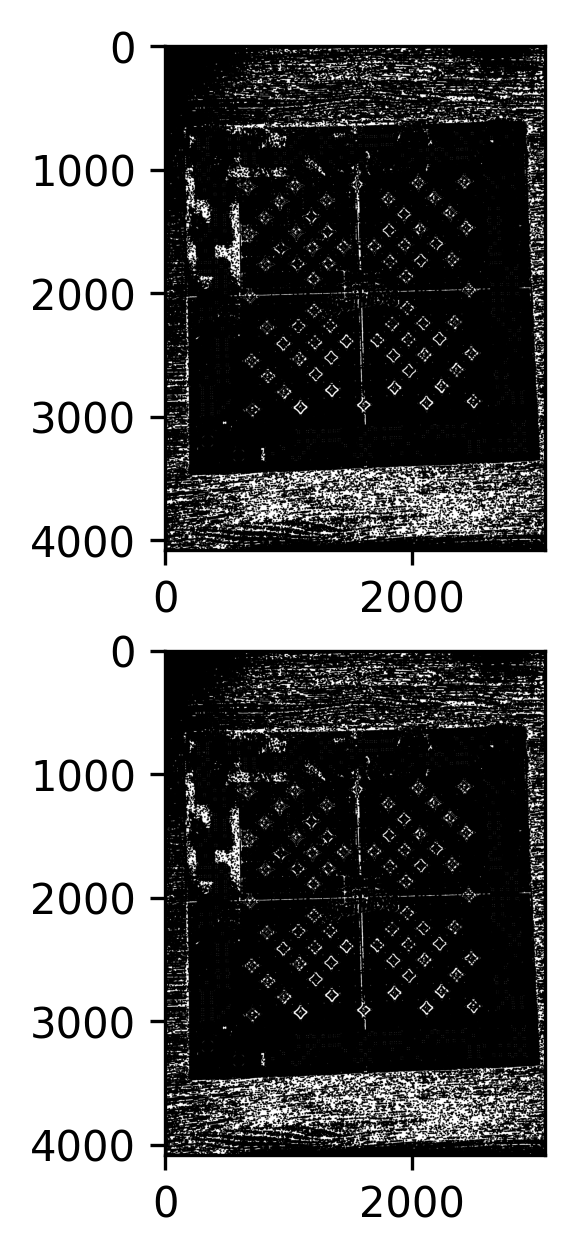

In [213]:
contours, hierarchy = cv2.findContours(board_eroded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
board_contour = cv2.drawContours(board_eroded, contours, -1, (0,255,0), 3)
print(len(contours), contours[0])
_, ax = plt.subplots(2, dpi=300)
ax[0].imshow(to_rgb(board_eroded))
ax[1].imshow(to_rgb(board_contour))

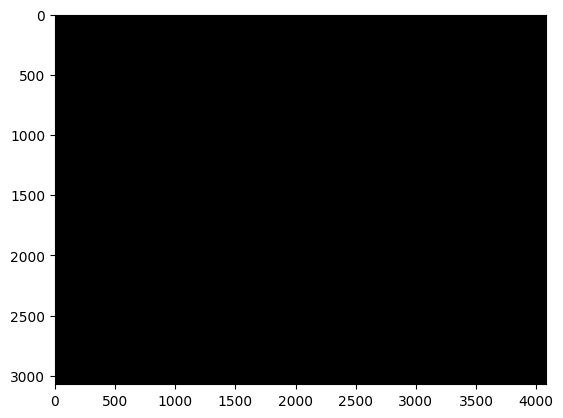

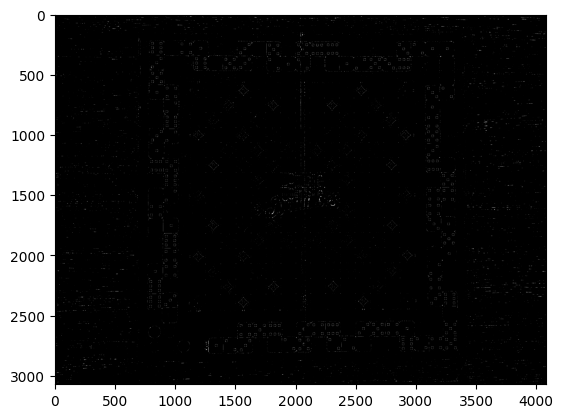

In [106]:
plt.imshow(cv2.cvtColor(board_contour, cv2.COLOR_GRAY2BGR))

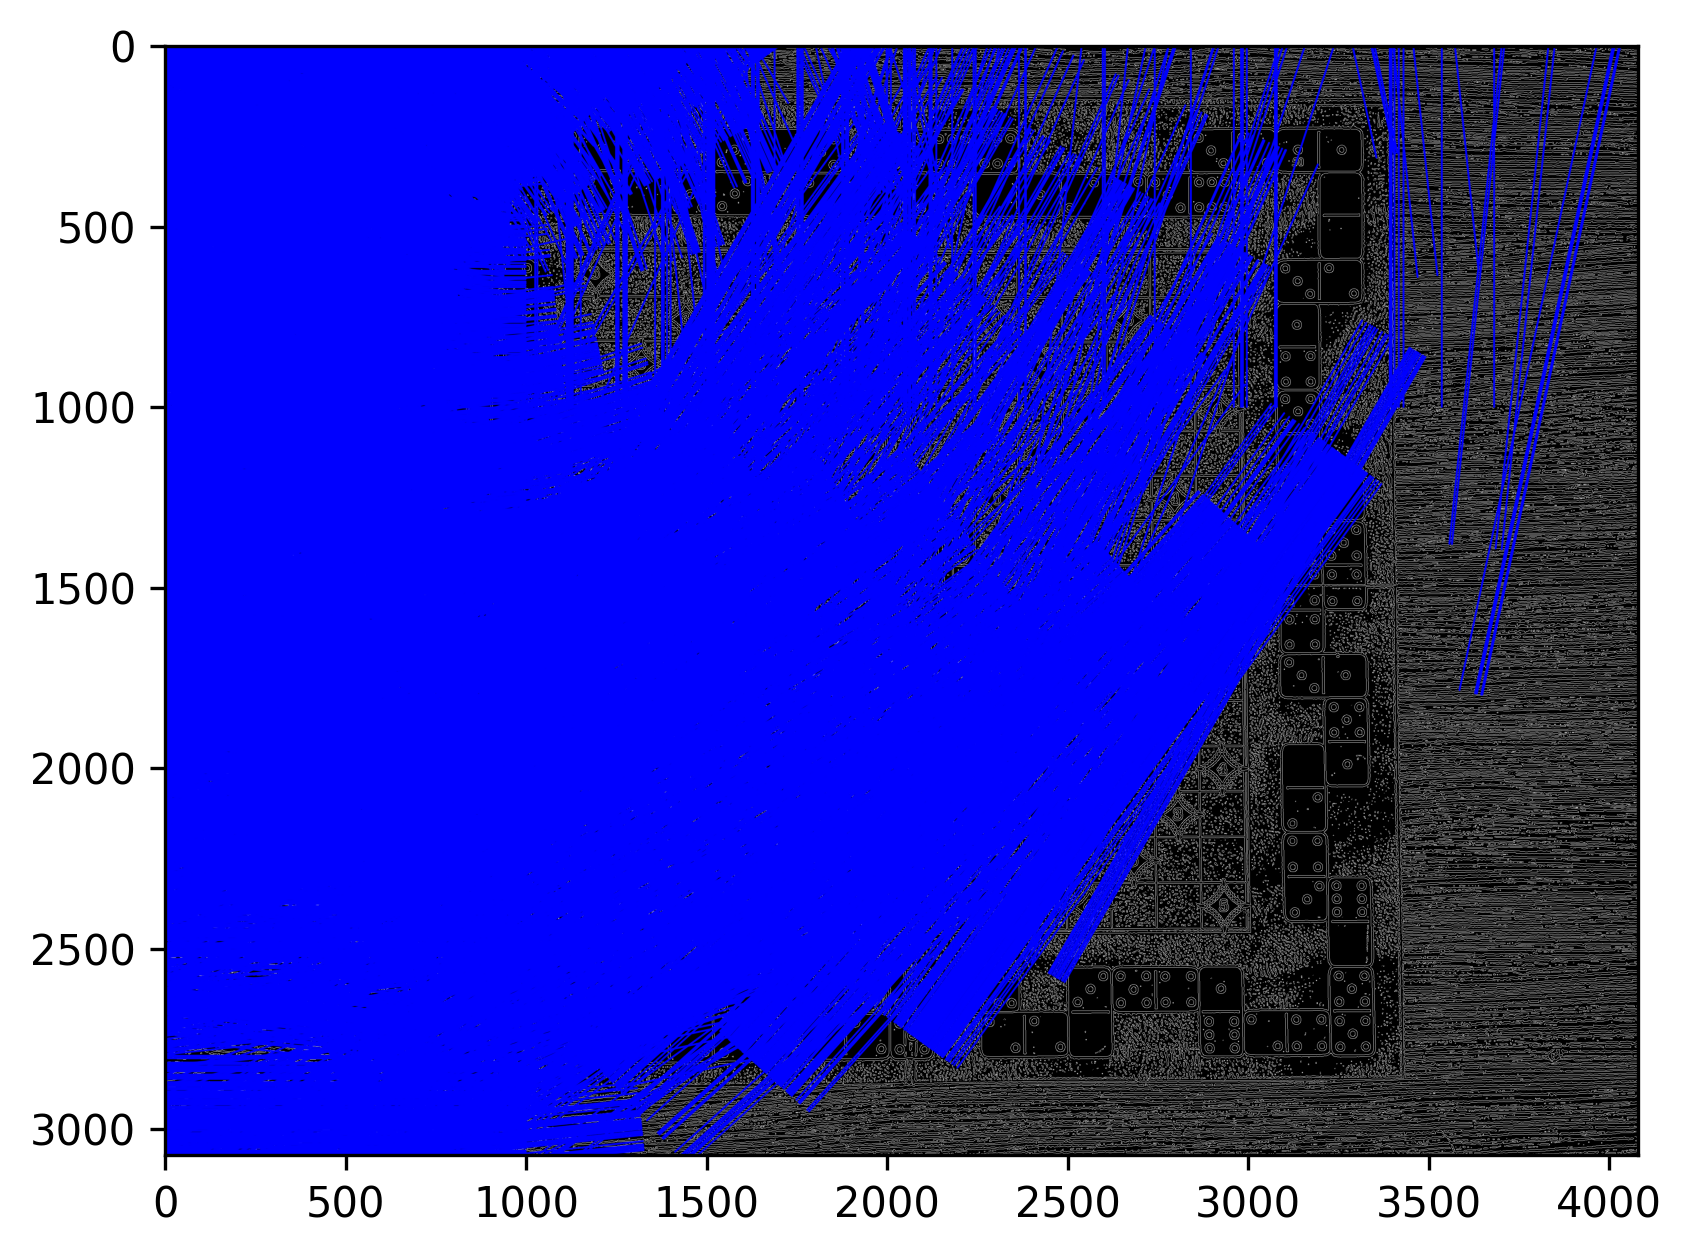

In [99]:
board_lines = cv2.HoughLines(board_canny, 1, np.pi/30, 600)
board_with_lines = cv2.cvtColor(board_canny, cv2.COLOR_GRAY2BGR)

# taken from https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
for i in range(0, len(board_lines)):
    rho = board_lines[i][0][0]
    theta = board_lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(board_with_lines, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.figure(dpi=300)
plt.imshow(board_with_lines)